# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [ ]:
#pip install citipy

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key
print(weather_api_key)

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

c25c1fa606e9a7409b8debce862b211a


In [59]:
output_data_file = "output_data/cities.csv"

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

613

In [ ]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
url

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

citylist = []
recordcnt = 1
setcnt = 1
for i, city in enumerate (cities):
    if (i % 50 == 0 and i >=50):
        setcnt = setcnt + 1
        recordcnt = 0
    city_url = url + "&q=" + city 
    print("Processing Record %s of Set %s | %s" % (recordcnt, setcnt, city))
    recordcnt = recordcnt+1
    try:
        weather=requests.get(city_url).json()
        lat = weather["coord"]["lat"]
        lng = weather["coord"]["lon"]
        max_temp = weather["main"]["temp_max"]
        humidity = weather["main"]["humidity"]
        clouds = weather["clouds"]["all"]
        wind = weather["wind"]["speed"]
        country = weather["sys"]["country"]
        date = weather["dt"]
        citylist.append({
            "City":city,
            "Lat":lat,
            "Lng":lng,
            "Max_temp":max_temp,
            "Humidity":humidity,
            "Clouds":clouds,
            "Wind":wind,
            "Country":country,
            "Date":date    
        })
    except:
        print("city_not_found")
        pass

Processing Record 1 of Set 1 | kutum
Processing Record 2 of Set 1 | labutta
city_not_found
Processing Record 3 of Set 1 | alyangula
Processing Record 4 of Set 1 | fortuna
Processing Record 5 of Set 1 | ushuaia
Processing Record 6 of Set 1 | manuk mangkaw
Processing Record 7 of Set 1 | airai
Processing Record 8 of Set 1 | andenes
Processing Record 9 of Set 1 | east london
Processing Record 10 of Set 1 | busselton
Processing Record 11 of Set 1 | ilulissat
Processing Record 12 of Set 1 | rikitea
Processing Record 13 of Set 1 | barrow
Processing Record 14 of Set 1 | hamilton
Processing Record 15 of Set 1 | albany
Processing Record 16 of Set 1 | nsanje
Processing Record 17 of Set 1 | thompson
Processing Record 18 of Set 1 | qaanaaq
Processing Record 19 of Set 1 | port blair
Processing Record 20 of Set 1 | severo-kurilsk
Processing Record 21 of Set 1 | khatanga
Processing Record 22 of Set 1 | luderitz
Processing Record 23 of Set 1 | bargal
city_not_found
Processing Record 24 of Set 1 | nikol

Processing Record 42 of Set 4 | sentyabrskiy
city_not_found
Processing Record 43 of Set 4 | batticaloa
Processing Record 44 of Set 4 | hiliseu-horia
Processing Record 45 of Set 4 | guerrero negro
Processing Record 46 of Set 4 | kargil
Processing Record 47 of Set 4 | buritama
Processing Record 48 of Set 4 | ust-tsilma
Processing Record 49 of Set 4 | santa maria
Processing Record 0 of Set 5 | tuatapere
Processing Record 1 of Set 5 | puerto madryn
Processing Record 2 of Set 5 | ribeira grande
Processing Record 3 of Set 5 | erie
Processing Record 4 of Set 5 | pontianak
Processing Record 5 of Set 5 | lazaro cardenas
Processing Record 6 of Set 5 | cagayan de tawi-tawi
city_not_found
Processing Record 7 of Set 5 | amderma
city_not_found
Processing Record 8 of Set 5 | mjolby
Processing Record 9 of Set 5 | orotukan
Processing Record 10 of Set 5 | mount gambier
Processing Record 11 of Set 5 | jamestown
Processing Record 12 of Set 5 | leningradskiy
Processing Record 13 of Set 5 | burnie
Processin

Processing Record 40 of Set 8 | mersing
Processing Record 41 of Set 8 | nizwa
Processing Record 42 of Set 8 | thunder bay
Processing Record 43 of Set 8 | kerouane
Processing Record 44 of Set 8 | mandalgovi
Processing Record 45 of Set 8 | yanan
city_not_found
Processing Record 46 of Set 8 | praia
Processing Record 47 of Set 8 | labuhan
Processing Record 48 of Set 8 | aksarka
Processing Record 49 of Set 8 | bongaree
Processing Record 0 of Set 9 | inhambane
Processing Record 1 of Set 9 | chiredzi
Processing Record 2 of Set 9 | terra santa
Processing Record 3 of Set 9 | inyonga
Processing Record 4 of Set 9 | shanting
Processing Record 5 of Set 9 | casablanca
Processing Record 6 of Set 9 | bauchi
Processing Record 7 of Set 9 | nome
Processing Record 8 of Set 9 | rawson
Processing Record 9 of Set 9 | rancho palos verdes
Processing Record 10 of Set 9 | jacksonville
Processing Record 11 of Set 9 | banjar
Processing Record 12 of Set 9 | prado
Processing Record 13 of Set 9 | harrison
Processing 

Processing Record 35 of Set 12 | hirara
Processing Record 36 of Set 12 | surovikino
Processing Record 37 of Set 12 | pandan
Processing Record 38 of Set 12 | coahuayana
Processing Record 39 of Set 12 | saleaula
city_not_found
Processing Record 40 of Set 12 | namatanai
Processing Record 41 of Set 12 | mareeba
Processing Record 42 of Set 12 | olafsvik
Processing Record 43 of Set 12 | iranshahr
Processing Record 44 of Set 12 | egvekinot
Processing Record 45 of Set 12 | bibiani
Processing Record 46 of Set 12 | koumra
Processing Record 47 of Set 12 | omegna
Processing Record 48 of Set 12 | pangody
Processing Record 49 of Set 12 | dong hoi
Processing Record 0 of Set 13 | scarborough
Processing Record 1 of Set 13 | chippenham
Processing Record 2 of Set 13 | walvis bay
Processing Record 3 of Set 13 | sokur
Processing Record 4 of Set 13 | coswig
Processing Record 5 of Set 13 | at-bashi
Processing Record 6 of Set 13 | urdzhar
city_not_found
Processing Record 7 of Set 13 | hakodate
Processing Reco

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [40]:
city_df= pd.DataFrame(citylist)
city_df.count()

City        562
Lat         562
Lng         562
Max_temp    562
Humidity    562
Clouds      562
Wind        562
Country     562
Date        562
dtype: int64

In [61]:
city_df.to_csv('weather_city_data.csv', index_label="City_ID")
#city_data_pd.to_csv(output_data_file, index_label="City_ID")

In [43]:
city_df.head(5)

,City,Lat,Lng,Max_temp,Humidity,Clouds,Wind,Country,Date
0,kutum,14.20,24.67,91.76,18,97,8.72,SD,1593359456
1,alyangula,-13.85,136.42,66.20,93,87,9.91,AU,1593359456
2,fortuna,40.60,-124.16,57.00,87,90,12.75,US,1593359456
3,ushuaia,-54.80,-68.30,35.60,69,75,19.46,AR,1593359278
4,manuk mangkaw,4.80,119.85,80.13,80,100,5.03,PH,1593359456


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

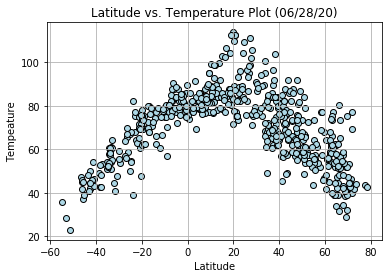

In [14]:
plt.scatter(city_df["Lat"],city_df["Max_temp"],edgecolor="black", c="lightblue")
plt.title("Latitude vs. Temperature Plot (%s)" % time.strftime("%x"))
plt.ylabel("Tempeature")
plt.xlabel("Latitude")
plt.grid(True)

#### Latitude vs. Humidity Plot

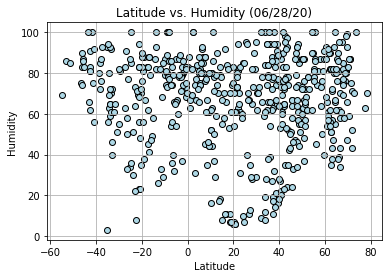

In [16]:
plt.scatter(city_df["Lat"],city_df["Humidity"],edgecolor="black",c="lightblue")
plt.title("Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

#### Latitude vs. Cloudiness Plot

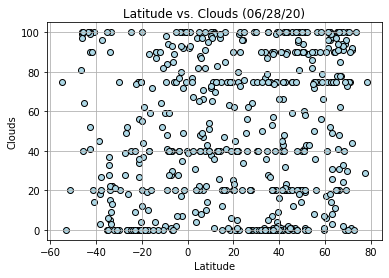

In [19]:
plt.scatter(city_df["Lat"],city_df["Clouds"],edgecolor="black",c="lightblue")
plt.title("Latitude vs. Clouds (%s)" % time.strftime("%x"))
plt.ylabel("Clouds")
plt.xlabel("Latitude")
plt.grid(True)

#### Latitude vs. Wind Speed Plot

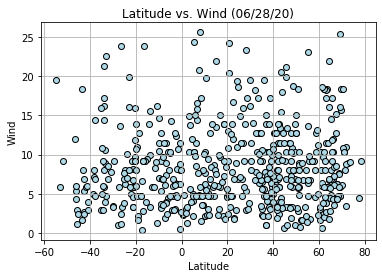

In [18]:
plt.scatter(city_df["Lat"],city_df["Wind"],edgecolor="black",c="lightblue")
plt.title("Latitude vs. Wind (%s)" % time.strftime("%x"))
plt.ylabel("Wind")
plt.xlabel("Latitude")
plt.grid(True)

In [26]:
#from scipy.stats import linregress

## Linear Regression

In [28]:
# OPTIONAL: Create a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(title)
    print(f"The r-squared is: {rvalue}")
    plt.show()

In [35]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemi_df = city_df.loc[(city_df["Lat"] >= 0)]
southern_hemi_df = city_df.loc[(city_df["Lat"] < 0)]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.7325931030652063


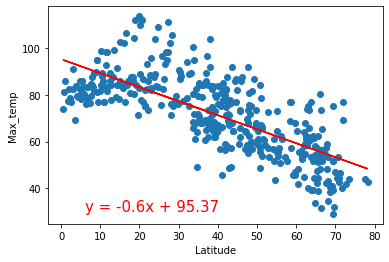

In [37]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max_temp"]
plot_linear_regression(x_values, y_values, 'Max_temp',(6,30))

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression